In [7]:
import numpy as np
import random

np.random.seed(13)
random.randint(0, 100)

61

In [16]:
zeros = np.zeros((8, 5, 13))
ones = np.ones((8, 5, 13))
t = zeros @ ones
s = zeros * ones
p = zeros.dot(ones)
k = np.matmul(zeros, ones)

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt ### Библиотека для рисования графичков, гистограмм, и проч.

### нужно писать магию чтобы графики рисовались внутри jupyter notebook 
%matplotlib inline              

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


##### Игрушечный пример

In [18]:
df = pd.DataFrame(
    data=np.array([
        ['f', 55, 171],
        ['f', 54, 180],
        ['f', 60, 173],
        ['f', 59, 180],
        ['m', 60, 177],
        ['m', 65, 177],
        ['m', 75, 165],
        ['m', 83, 182],
        ['m', 72, 165],
        ['m', 85, 183],
        ['f', 49, 172],
        ['f', 55, 155],
       ]).T, 
    index=['sex', 'weight', 'height']).T

In [19]:
df

,sex,weight,height
0,f,55,171
1,f,54,180
2,f,60,173
3,f,59,180
4,m,60,177
5,m,65,177
6,m,75,165
7,m,83,182
8,m,72,165
9,m,85,183


In [20]:
df.weight = df.weight.astype(np.int32)
df.height = df.height.astype(np.int32)

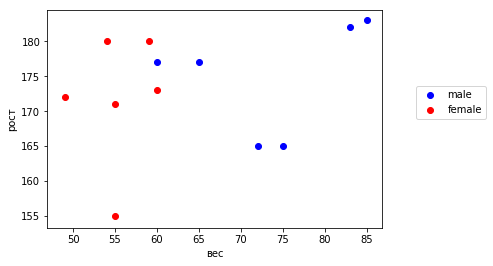

In [21]:
plt.scatter(df.weight[df.sex=='m'], df.height[df.sex=='m'], color = 'blue', label='male');
plt.scatter(df.weight[df.sex=='f'], df.height[df.sex=='f'], color = 'red', label='female');
plt.legend(loc=[1.1, 0.5]);
plt.ylabel('рост');
plt.xlabel('вес');

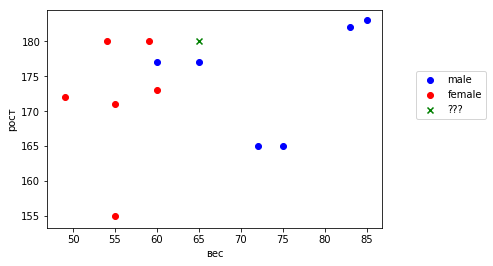

In [22]:
plt.scatter(df.weight[df.sex=='m'], df.height[df.sex=='m'], color = 'blue', label='male');
plt.scatter(df.weight[df.sex=='f'], df.height[df.sex=='f'], color = 'red', label='female');

plt.scatter(65, 180, color = 'green', marker='x', label='???');
plt.legend(loc=[1.1, 0.5]);
plt.ylabel('рост');
plt.xlabel('вес');

________

## Попредсказываем?

##### пандас умеет в интернет

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';')
df = df[np.logical_and(df.age > 18, df.age < 50)] 

In [24]:
df.shape

(249, 4)

In [25]:
df_train = df.loc[:100]
df_test = df.loc[150:180]

In [26]:
df_train.head()

,height,weight,age,male
3,156.845,53.041915,41.0,1
5,163.830,62.992589,35.0,1
6,149.225,38.243476,32.0,0
7,168.910,55.479971,27.0,1
8,147.955,34.869885,19.0,0


In [27]:
def plot(df):
    plt.scatter(df.weight[df.male==1], df.height[df.male==1], color = 'blue', label='male');
    plt.scatter(df.weight[df.male==0], df.height[df.male==0], color = 'red', label='female');
    plt.legend(loc=[1.1, 0.5]);
    plt.ylabel('рост');
    plt.xlabel('вес');

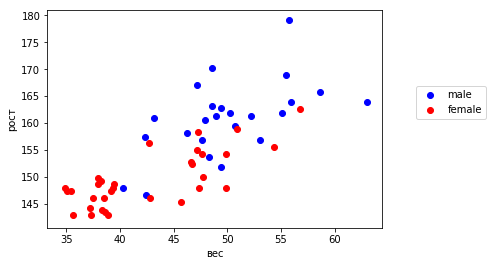

In [28]:
plot(df_train)

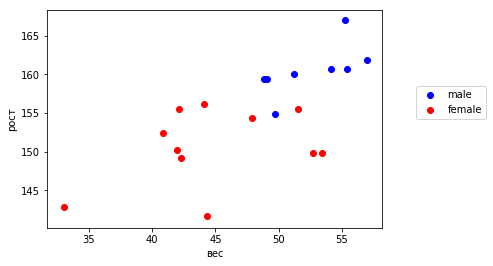

In [29]:
plot(df_test)

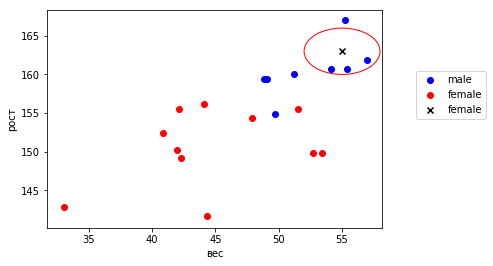

In [30]:
plt.scatter(df_test.weight[df_test.male==1], df_test.height[df_test.male==1], color = 'blue', label='male');
plt.scatter(df_test.weight[df_test.male==0], df_test.height[df_test.male==0], color = 'red', label='female');

plt.scatter(55, 163, color = 'black', marker='x', label='female');
c1 = plt.Circle((55, 163), 3, color='r', fill=False)
plt.gcf().gca().add_artist(c1)

plt.legend(loc=[1.1, 0.5]);
plt.ylabel('рост');
plt.xlabel('вес');

> Заметили почему наша окружность нарисовалась в виде эллипса?

##### Напишем свой классификатор который считает N-ближайших соседей - делает предсказание на основании большинства его соседей.

In [31]:
np.argsort( np.array([5,2,2,0,0]) ) # возвращает индексы элементов так 
                                    # как если бы элементы были отсортированы в порядке неубывания

array([3, 4, 1, 2, 0])

In [32]:
np.bincount( np.array([5,2,2,0,0]) ) # возвращает число вхождений каждого значения
                                     # длина массива - на один больше макс. значения

array([2, 0, 2, 0, 0, 1])

In [33]:
np.argmax( [1, 2, 200, 5, 2] )       # вернет позицию на которой стоит максимальный элемент

2

In [34]:
X_train = df_train[['height', 'weight']].values
y_train = df_train['male'].values

X_test = df_test[['height', 'weight']].values

In [35]:
X_train

array([[156.845    ,  53.0419145],
       [163.83     ,  62.992589 ],
       [149.225    ,  38.2434755],
       [168.91     ,  55.4799715],
       [147.955    ,  34.869885 ],
       [154.305    ,  49.89512  ],
       [149.9      ,  47.7      ],
       [163.195    ,  48.5626935],
       [157.48     ,  42.3258035],
       [143.9418   ,  38.3568735],
       [161.29     ,  48.987936 ],
       [156.21     ,  42.7226965],
       [148.59     ,  37.9032815],
       [147.32     ,  35.4652245],
       [147.955    ,  40.312989 ],
       [161.925    ,  55.111428 ],
       [146.05     ,  37.5063885],
       [146.05     ,  38.498621 ],
       [152.7048   ,  46.606578 ],
       [142.875    ,  38.838815 ],
       [142.875    ,  35.5786225],
       [147.955    ,  47.400364 ],
       [160.655    ,  47.8823055],
       [151.765    ,  49.4131785],
       [162.8648   ,  49.384829 ],
       [147.32     ,  39.12231  ],
       [147.955    ,  49.89512  ],
       [143.51     ,  38.55532  ],
       [146.7      ,

In [36]:
y_train

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

_________

In [37]:
# стандартизуем

mean_ = X_train.mean(axis=0)
std_ = X_train.std(axis=0)

X_train = (X_train - mean_) / std_
X_test = (X_test - mean_) / std_

In [38]:
X_test

array([[-0.00940195,  0.30741582],
       [ 1.54708469,  1.39138484],
       [-1.41023993, -1.88563345],
       [-0.24287495, -0.72214548],
       [ 0.68856588,  0.80138898],
       [ 0.61319271,  0.48319458],
       [-0.55417228,  1.13190191],
       [ 0.76884137,  1.2281617 ],
       [ 0.76884137,  1.41649609],
       [-0.63199661, -0.52125547],
       [ 0.06842238,  0.57945438],
       [-1.56588859, -0.21155004],
       [-0.5168166 , -0.56310755],
       [ 0.14624671,  0.84312252],
       [ 0.22407105, -0.2450317 ],
       [-0.55417228,  1.01890128],
       [ 0.61319271,  0.45389812],
       [ 0.92449004,  1.65086777],
       [ 0.14624671, -0.54218151]])

________

In [39]:
class KNN:
    """
    simple KNN classifier
    """
    
    def __init__(self, n):
        self.n = n
        
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        y = []
        assert len(X.shape) == 2
        for (h, w) in X:
            ### Посчитаем расстояние от всех элементов в тренировочной выборке
            # до текущего примера -> результат - вектор размерности трейна
            d = np.sqrt((h - self.X[:, 0]) ** 2 + (w - self.X[:, 1]) ** 2)
            ### Возьмем индексы n элементов, расстояние до которых минимально
            ### результат -> вектор из n элементов
            idx = np.argsort(d)[:self.n]
            ### Посчитаем частоту меток для каждого случая 
            ### результат -> вектор длинны 2 который покажет
            ### сколько соседей 0-го класса, сколько соседей 1-го класса.
            counts = np.bincount(self.y[idx])
            ### возьмем самый часто встречаемый в соседях класс.
            prediction = np.argmax(counts)
            y.append(prediction)
        return y

In [64]:
knn = KNN(8)

_______

In [65]:
y_train[np.array([1, 2])]

array([1, 0])

In [66]:
knn.fit(X_train, y_train)

In [67]:
y_pred = knn.predict(X_test)

In [68]:
'acc = %f' % np.mean(y_pred == df_test['male'].values)

'acc = 0.947368'

##### Круто. а где мы ошиблись ?

In [69]:
df_test[y_pred != df_test['male'].values]

,height,weight,age,male
165,154.94,49.696673,26.0,1


> мальчик ростом 154 см с весом ~50 кг. - кажется сложный кейс.

__________